In [4]:
import pandas as pd

In [9]:
df = pd.read_csv('bbc_news.csv') #uploading the data file 
df.dropna(subset=['title', 'description'], inplace= True) #deleting the empty field in the data 
df.drop_duplicates(subset=['title', 'description'], inplace= True) #remobing the duplicate data



In [8]:
import re

def remove_urls(text):
    return re.sub(r'https?://\S+|www\.\S+', '', str(text))

df['description'] = df['description'].apply(remove_urls)


In [10]:
df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [14]:
labels = { 
    'Politics': ['election', 'government', 'parliament'],
    'Technology': ['ai', 'artificial intelligence', 'machine learning', 'robot'],
    'Health': ['covid', 'virus', 'mental health', 'vaccine'],
    'Sports': ['football', 'cricket', 'match', 'tournament']
}

def keyword_label(text):
    text = str(text).lower()
    for label, keywords in labels.items():
        if any(keyword in text for keyword in keywords):
            return label
    return None  
df['combined_text'] = df['title'].fillna('') + ' ' + df['description'].fillna('')

df['label'] = df['combined_text'].apply(keyword_label)

df.dropna(subset=['label'], inplace=True)

df.drop(columns=['combined_text'], inplace=True)
print(df['label'].value_counts())

label
Technology    13361
Politics       2481
Sports         1059
Health          437
Name: count, dtype: int64


**Model Training** 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [16]:
df.head()

,title,pubDate,guid,link,description,label
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...,Technology
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as...",Technology
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...,Technology
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...,Technology
5,Ukraine war: PM to hold talks with world leade...,"Mon, 07 Mar 2022 08:33:29 GMT",https://www.bbc.co.uk/news/uk-60642926,https://www.bbc.co.uk/news/uk-60642926?at_medi...,Boris Johnson is to meet the Canadian and Dutc...,Technology


In [18]:
X = df['title'].fillna('') + ' ' + df['description'].fillna('')
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust this
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [20]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [21]:
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8486159169550173

Classification Report:
               precision    recall  f1-score   support

      Health       0.00      0.00      0.00       106
    Politics       0.86      0.57      0.69       454
      Sports       0.62      0.04      0.08       191
  Technology       0.85      0.98      0.91      2717

    accuracy                           0.85      3468
   macro avg       0.58      0.40      0.42      3468
weighted avg       0.81      0.85      0.81      3468



c:\Users\krish\Desktop\Smart _news_organiser\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\krish\Desktop\Smart _news_organiser\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\krish\Desktop\Smart _news_organiser\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [24]:
from sklearn.utils import resample
import pandas as pd

# Separate classes
df_health = df[df['label'] == 'Health']
df_sports = df[df['label'] == 'Sports']
df_politics = df[df['label'] == 'Politics']
df_technology = df[df['label'] == 'Technology']

# Downsample Technology to 454 samples to match Politics
df_technology_downsampled = resample(df_technology, 
                                     replace=False, 
                                     n_samples=454, 
                                     random_state=42)

# Combine everything
df_balanced = pd.concat([df_health, df_sports, df_politics, df_technology_downsampled])

print(df_balanced['label'].value_counts())


label
Politics      2481
Sports        1059
Technology     454
Health         437
Name: count, dtype: int64


In [29]:
from sklearn.utils import resample

# Separate majority and minority classes
df_tech = df[df.label == 'Technology']
df_other = df[df.label != 'Technology']

# Downsample Technology
df_tech_downsampled = resample(df_tech, 
                               replace=False,
                               n_samples=len(df_other),
                               random_state=42)

# Combine
df_balanced = pd.concat([df_tech_downsampled, df_other])

# Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [30]:
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8486159169550173

Classification Report:
               precision    recall  f1-score   support

      Health       0.00      0.00      0.00       106
    Politics       0.86      0.57      0.69       454
      Sports       0.62      0.04      0.08       191
  Technology       0.85      0.98      0.91      2717

    accuracy                           0.85      3468
   macro avg       0.58      0.40      0.42      3468
weighted avg       0.81      0.85      0.81      3468



c:\Users\krish\Desktop\Smart _news_organiser\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\krish\Desktop\Smart _news_organiser\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\krish\Desktop\Smart _news_organiser\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [32]:
from sklearn.linear_model import LogisticRegression

# Retrain model with class weighting
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict again
y_pred = model.predict(X_test_tfidf)

# Evaluation
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9437716262975778

Classification Report:
               precision    recall  f1-score   support

      Health       0.68      0.97      0.80       106
    Politics       0.98      0.94      0.96       454
      Sports       0.63      0.95      0.75       191
  Technology       0.99      0.94      0.96      2717

    accuracy                           0.94      3468
   macro avg       0.82      0.95      0.87      3468
weighted avg       0.96      0.94      0.95      3468



In [33]:
import joblib

joblib.dump(model, 'news_classifier.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [48]:
def predict_news_ByTitle(title, description):
    combined = title + ' ' + description
    vectorized = vectorizer.transform([combined])
    prediction = model.predict(vectorized)[0]
    return prediction

def predict_Text(text):
    text = text.lower()
    tfidf = vectorizer.transform([text])
    prediction = model.predict(tfidf)[0]
    return prediction

# Example:
print(predict_news_category("India Wins surgeric compition Match", "India wins eye surgery competition against Australia"))


Technology


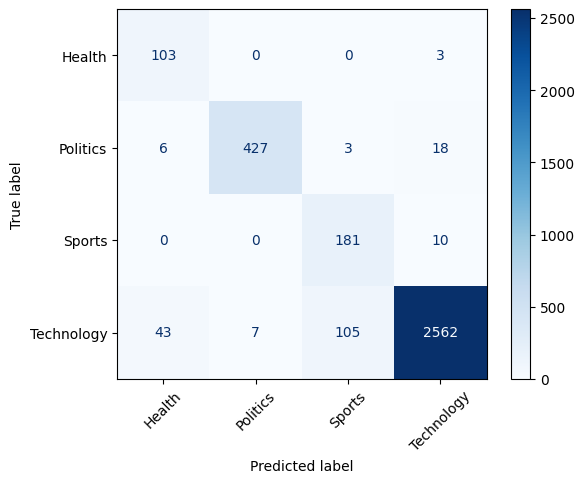

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)


In [50]:
text = "India wins eye surgery competition against Australia"
print("Predicted Category:", predict_Text(text))


Predicted Category: Technology


In [51]:
import requests

url = "http://127.0.0.1:8000/predict"
data = {"text": "India wins cricket world cup match today"}

response = requests.post(url, json=data)
print(response.json())


{'category': 'Sports'}
